<a href="https://colab.research.google.com/github/rameshavinash94/CMPE255_Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT Modules**

In [ ]:
#load the necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## **LOAD DATASET**

In [ ]:
#load the input data
customers=pd.read_csv("/content/segmentation data.csv")

In [ ]:
customers.shape

(2000, 8)

In [ ]:
customers.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [ ]:
customers.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
customers.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
#create a minmax scaler
scaler=MinMaxScaler()
scaled_data =scaler.fit_transform(customers)
Scaled_Df = pd.DataFrame(scaled_data, columns=customers.columns)

In [ ]:
Scaled_Df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.000000,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,0.000500,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.001001,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.001501,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.002001,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...,...
1995,0.997999,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,0.998499,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.998999,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,0.999500,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


## **PCA to Reduce Dimensionality for Visualization**

In [ ]:
pca=PCA(n_components=2)
plot_pca = pca.fit_transform(Scaled_Df)
pca_df = pd.DataFrame(plot_pca)

## **KMeans**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Scaled_Df)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[3.43225048e-01 1.90839695e-03 1.77635684e-15 3.79178731e-01
  2.74809160e-01 4.00057048e-01 6.33587786e-01 7.57633588e-01]
 [6.58693784e-01 9.04929577e-01 1.00000000e+00 2.36127975e-01
  3.92018779e-01 2.43674247e-01 2.50880282e-01 7.65845070e-02]
 [3.38471589e-01 5.22352941e-01 1.00000000e+00 3.04543611e-01
  4.60392157e-01 3.77343010e-01 5.89411765e-01 6.68235294e-01]
 [6.25593335e-01 3.66459627e-01 1.72084569e-15 3.21553509e-01
  2.68461008e-01 2.35997823e-01 1.77018634e-01 3.00207039e-02]]


### **Visualization without PCA**

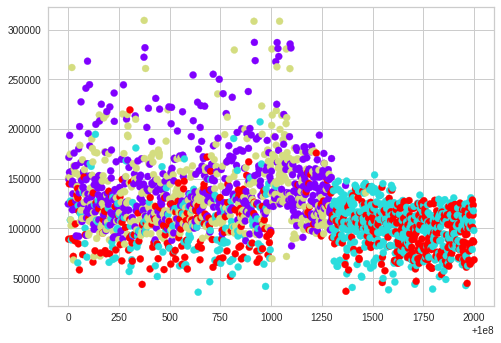

In [ ]:
plt.scatter(customers.iloc[:,0], customers.iloc[:, 5], c=kmeans.labels_,cmap='rainbow')
plt.show()

### **Visualization after PCA**

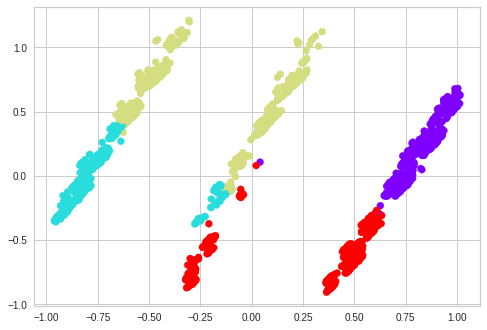

In [ ]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=kmeans.labels_,cmap='rainbow')
plt.show()

## **Hierarchical Clustering**

### **Hierarchical Clustering - Single link**

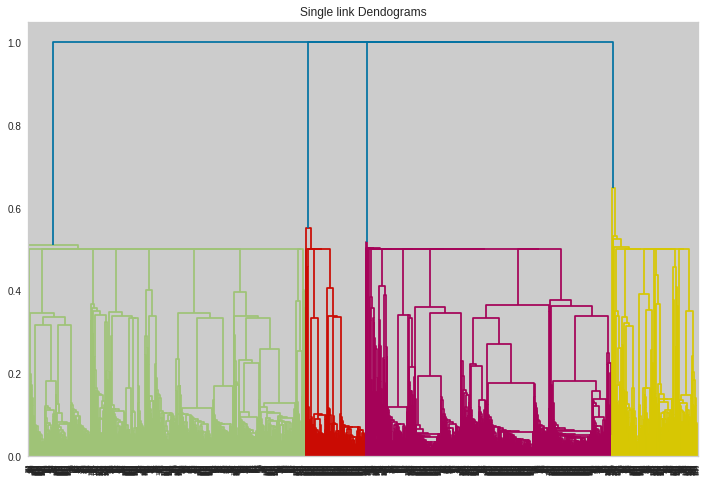

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Single link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="single"))
plt.show()

#### **Visualization without PCA**

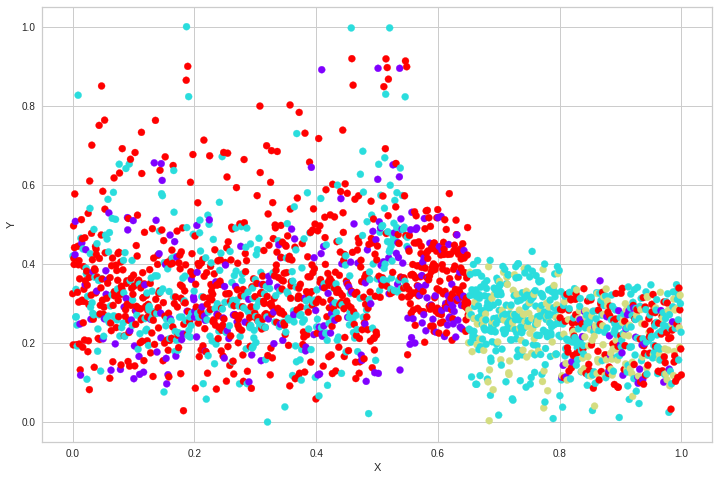

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="single")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,5], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### **Visualization after PCA**

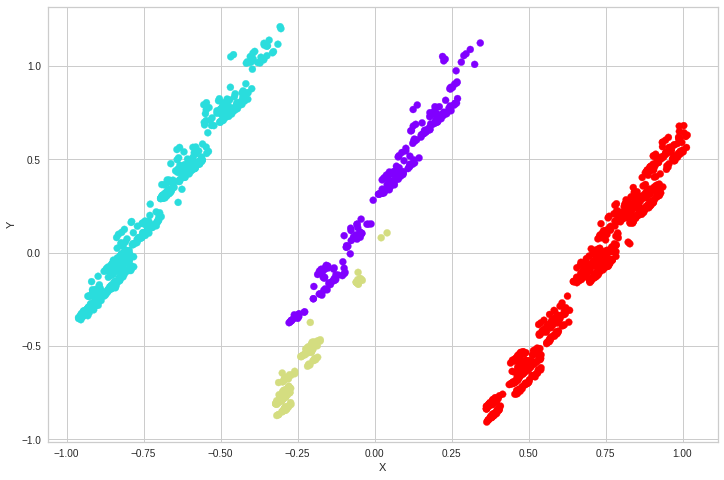

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="single")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### **Hierarchical Clustering - Average link**

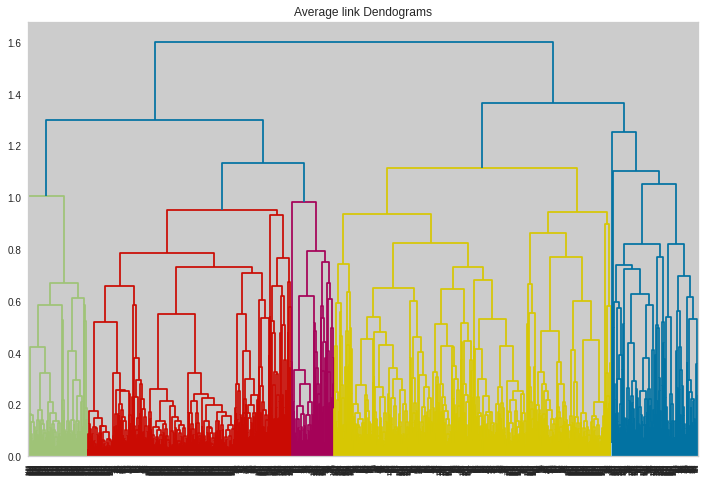

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Average link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="average"))
plt.show()

#### **Visualization without PCA**

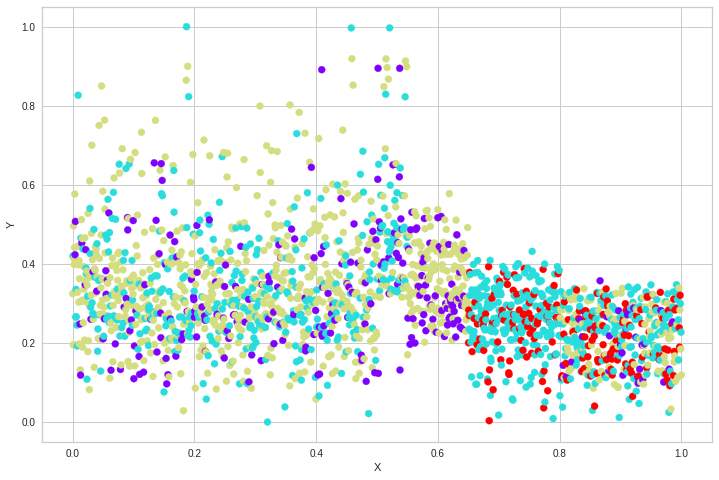

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,5], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### **Visualization after PCA**

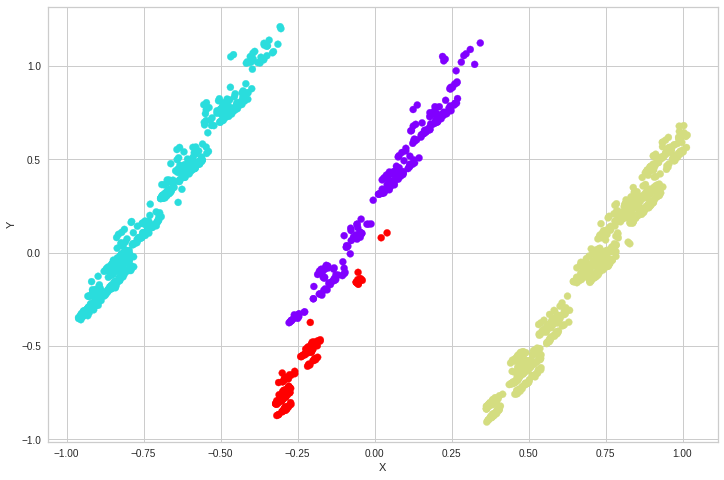

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### **Hierarchical Clustering - Complete link**

{'icoord': [[35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [55.0, 55.0, 65.0, 65.0], [32.5, 32.5, 60.0, 60.0], [15.0, 15.0, 46.25, 46.25], [5.0, 5.0, 30.625, 30.625], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [115.0, 115.0, 125.0, 125.0], [92.5, 92.5, 120.0, 120.0], [75.0, 75.0, 106.25, 106.25], [17.8125, 17.8125, 90.625, 90.625], [155.0, 155.0, 165.0, 165.0], [145.0, 145.0, 160.0, 160.0], [135.0, 135.0, 152.5, 152.5], [175.0, 175.0, 185.0, 185.0], [205.0, 205.0, 215.0, 215.0], [195.0, 195.0, 210.0, 210.0], [180.0, 180.0, 202.5, 202.5], [143.75, 143.75, 191.25, 191.25], [54.21875, 54.21875, 167.5, 167.5], [255.0, 255.0, 265.0, 265.0], [245.0, 245.0, 260.0, 260.0], [235.0, 235.0, 252.5, 252.5], [225.0, 225.0, 243.75, 243.75], [275.0, 275.0, 285.0, 285.0], [234.375, 234.375, 280.0, 280.0], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [295.0, 295.0, 312.5, 312.5], [345.0, 345.0, 355.0, 355.0], [335.0, 335.0, 350.0, 350.0], [375.0, 375.0, 385.0, 385.0], [3

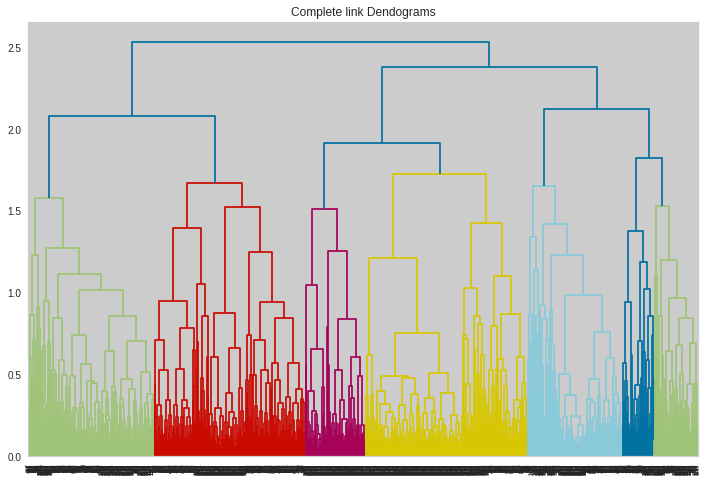

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Complete link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="complete"))
print(dend)
plt.show()

#### **Visualization without PCA**

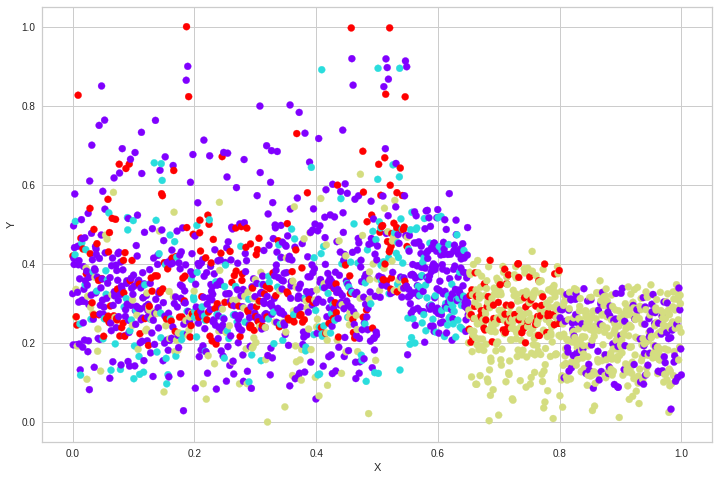

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="complete")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,5], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### **Visualization after PCA**

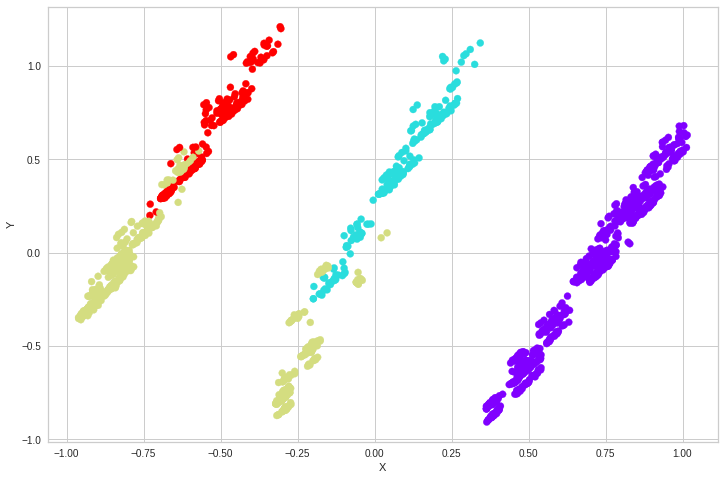

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="complete")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **Clustering using Gaussian Mixture**

In [ ]:
from sklearn import mixture
#Applying Gaussian Mixture function
model_gm = mixture.GaussianMixture(n_components=5).fit_predict(Scaled_Df)

### **Visualization without PCA**

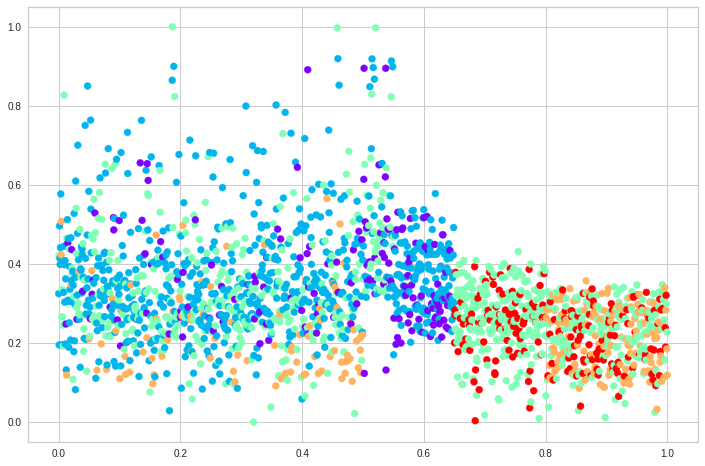

In [ ]:
plt.figure(figsize=(12, 8))  
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:, 5], c=model_gm, cmap='rainbow')

### **Visualization after PCA**

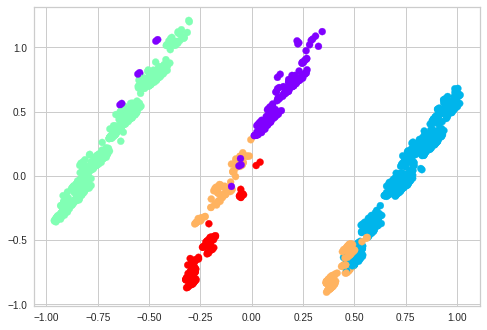

In [ ]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=model_gm,cmap='rainbow')
plt.show()

## **EXPLORING PYCARET LIBRARY FOR DBSCAN**

In [ ]:
from pycaret.clustering import *

In [ ]:
#setup
cluster = setup(Scaled_Df, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(2000, 8)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2000, 10)"
9,CPU Jobs,-1


In [ ]:
model = create_model('dbscan', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3211,678.8055,1.4223,0,0,0


In [ ]:
plot_model(model)

## **We are going to use Pycarat to evaluate the model metrics**

In [ ]:
kmeams_model=create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4934,1735.1369,0.8153,0,0,0


In [ ]:
agglomerative_model=create_model('hclust', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4934,1735.1369,0.8153,0,0,0


In [ ]:
dbscan = create_model('dbscan', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3211,678.8055,1.4223,0,0,0


In [127]:
evaluate_model(kmeams_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [128]:
evaluate_model(agglomerative_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [129]:
evaluate_model(dbscan)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

<Figure size 576x396 with 0 Axes>